# **More Filters!**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

Height: 6069, Width: 4855, RGB: 3


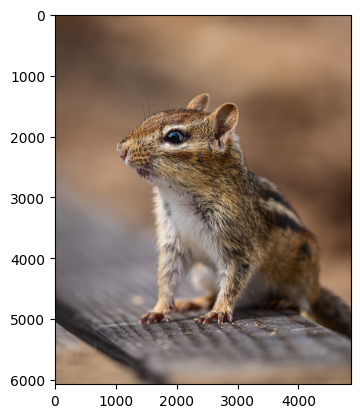

In [2]:
img = plt.imread("ImageSq.jpeg")
Nx, Ny, Nz = np.shape(img)
print(f"Height: {Nx}, Width: {Ny}, RGB: {Nz}")
plt.imshow(img)
plt.show()

In [3]:
print(img)

[[[ 86  62  38]
  [ 86  62  38]
  [ 86  62  38]
  ...
  [164 132 109]
  [164 132 109]
  [164 132 109]]

 [[ 86  62  38]
  [ 86  62  38]
  [ 86  62  38]
  ...
  [164 132 109]
  [164 132 109]
  [164 132 109]]

 [[ 86  62  38]
  [ 86  62  38]
  [ 86  62  38]
  ...
  [164 132 109]
  [164 132 109]
  [164 132 109]]

 ...

 [[156 129 100]
  [156 129 100]
  [156 129 100]
  ...
  [146 118  94]
  [146 118  94]
  [146 118  94]]

 [[156 129 100]
  [156 129 100]
  [156 129 100]
  ...
  [146 118  94]
  [146 118  94]
  [146 118  94]]

 [[156 129 100]
  [156 129 100]
  [156 129 100]
  ...
  [146 118  94]
  [146 118  94]
  [146 118  94]]]


## **The RGB Channels**

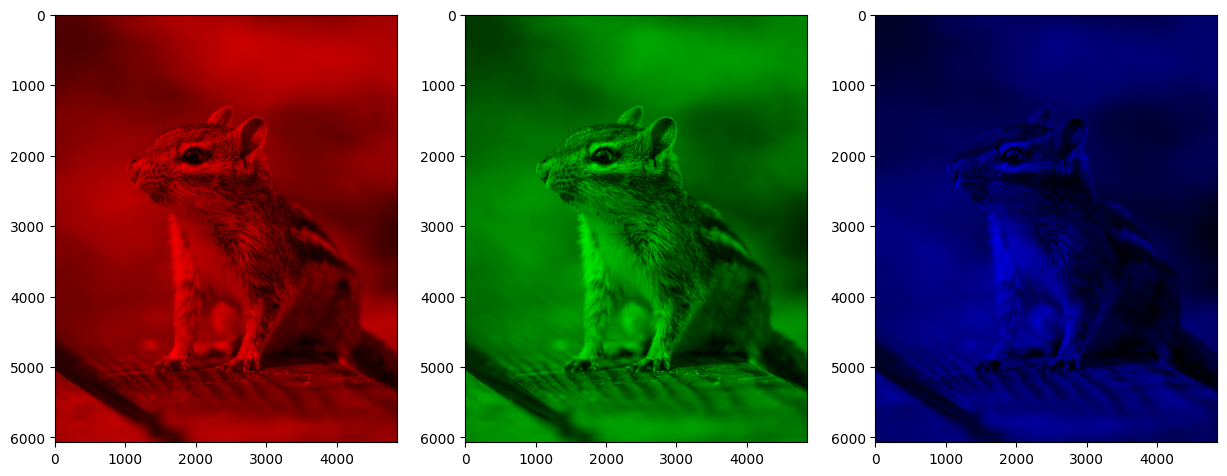

In [4]:
imgR, imgG, imgB = img.copy(), img.copy(), img.copy()
imgR[:, :, (1, 2)] = 0
imgG[:, :, (0, 2)] = 0
imgB[:, :, (0, 1)] = 0
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 15))
ax[0].imshow(imgR)
ax[1].imshow(imgG)
ax[2].imshow(imgB)
plt.show()

## **The Grayscale Image**

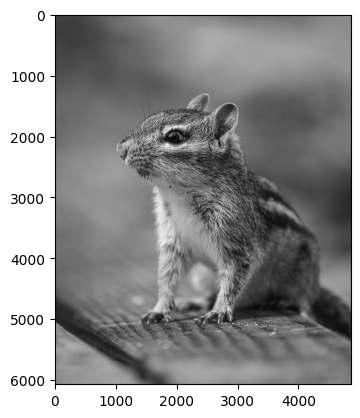

In [5]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img, rgb_weights)
plt.imshow(grayscale_image, cmap = "gray")
plt.show()

In [6]:
print(np.shape(grayscale_image))
print(grayscale_image)

(6069, 4855)
[[ 66.4314  66.4314  66.4314 ... 138.9296 138.9296 138.9296]
 [ 66.4314  66.4314  66.4314 ... 138.9296 138.9296 138.9296]
 [ 66.4314  66.4314  66.4314 ... 138.9296 138.9296 138.9296]
 ...
 [133.7514 133.7514 133.7514 ... 123.6214 123.6214 123.6214]
 [133.7514 133.7514 133.7514 ... 123.6214 123.6214 123.6214]
 [133.7514 133.7514 133.7514 ... 123.6214 123.6214 123.6214]]


## **Max Pooling**

In [104]:
def max_pool(image, kernel_size, stride):
    image_height, image_width, channels = image.shape
    kernel_height, kernel_width = kernel_size[0], kernel_size[1]

    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width, 3))

    for c in range(channels):
        for i in range(0, output_height * stride, stride):
            for j in range(0, output_width * stride, stride):
                output[i // stride, j // stride, c] = np.max(image[i : i + kernel_height, j : j + kernel_width, c])

    final = output.astype(np.uint8)
    return final

In [105]:
imgnew = max_pool(img, (3, 3), 3)

In [106]:
imgnew

array([[[ 86,  62,  38],
        [ 86,  62,  38],
        [ 86,  62,  38],
        ...,
        [164, 132, 109],
        [164, 132, 109],
        [164, 132, 109]],

       [[ 86,  62,  38],
        [ 86,  62,  38],
        [ 86,  62,  38],
        ...,
        [164, 132, 109],
        [164, 132, 109],
        [164, 132, 109]],

       [[ 86,  62,  38],
        [ 86,  62,  38],
        [ 86,  62,  38],
        ...,
        [164, 132, 109],
        [164, 132, 109],
        [164, 132, 109]],

       ...,

       [[160, 130, 102],
        [160, 130, 102],
        [160, 130, 102],
        ...,
        [147, 119,  95],
        [147, 119,  95],
        [147, 119,  95]],

       [[159, 129, 101],
        [159, 129, 101],
        [160, 130, 102],
        ...,
        [147, 119,  95],
        [147, 119,  95],
        [147, 119,  95]],

       [[156, 129, 100],
        [156, 129, 100],
        [156, 129, 100],
        ...,
        [148, 120,  96],
        [146, 118,  94],
        [146, 118,  94]]

In [107]:
imgnew.shape

(2023, 1618, 3)

### **Max Pooled using $3\times3$ filter and stride = $3$ Final Image: $(2023, 1618)$**

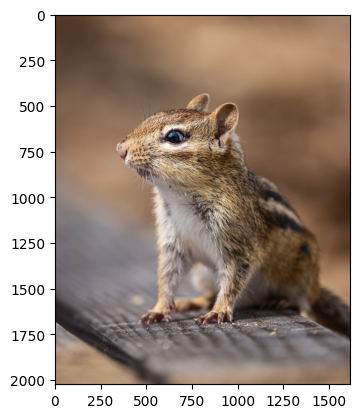

In [108]:
plt.imshow(imgnew)

In [109]:
plt.imsave("MaxPooled.jpeg", imgnew)

In [110]:
imgnew1 = max_pool(imgnew, (3, 3), 3)

In [111]:
imgnew1.shape

(674, 539, 3)

### **Further Max Pooled using $3\times3$ filter and stride = $3$ Final Image: $(674, 539)$**

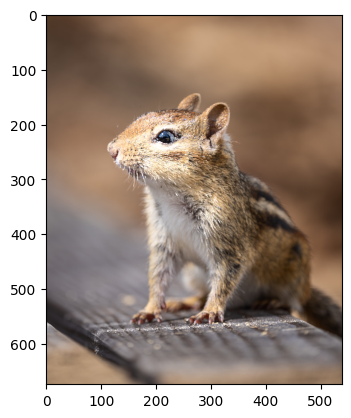

In [112]:
plt.imshow(imgnew1)

In [113]:
plt.imsave("FurtherMaxPooled.jpeg", imgnew1)

## **Average Pooling**

In [114]:
def avg_pool(image, kernel_size, stride):
    image_height, image_width, channels = image.shape
    kernel_height, kernel_width = kernel_size[0], kernel_size[1]

    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width, 3))

    for c in range(channels):
        for i in range(0, output_height * stride, stride):
            for j in range(0, output_width * stride, stride):
                output[i // stride, j // stride, c] = np.mean(image[i : i + kernel_height, j : j + kernel_width, c])

    final = output.astype(np.uint8)
    return final

In [115]:
imgavg = avg_pool(img, (3, 3), 3)
imgavg.shape

(2023, 1618, 3)

### **Average Pooled using $3\times3$ filter and stride = $3$ Final Image: $(2023, 1618)$**

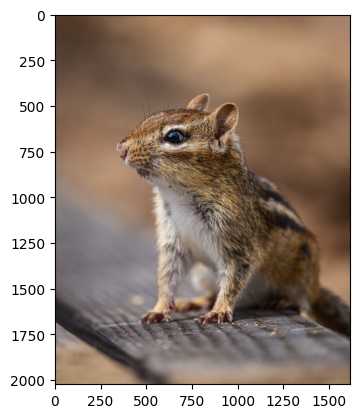

In [116]:
plt.imshow(imgavg)

In [117]:
plt.imsave("AvgPooled.jpeg", imgavg)